# <span style="color:blue"> Laboratorio di simulazione numerica </span>
## <span style="color:green">  Esercitazione numero 2</span>

### Esercizio 02.1

Lo scopo del primo esercizio è di andare a valutare l'integrale $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ con due metodi Monte Carlo separati.

Il primo consiste nell'usare un generatore di numeri casuali distribuiti uniformemente. Il grafico sottostante riporta i risultati ottenuti con il metodo a blocchi con $10^5$ lanci suddivisi in 100 blocchi, si osserva una buona convergenza al valore esatto. 

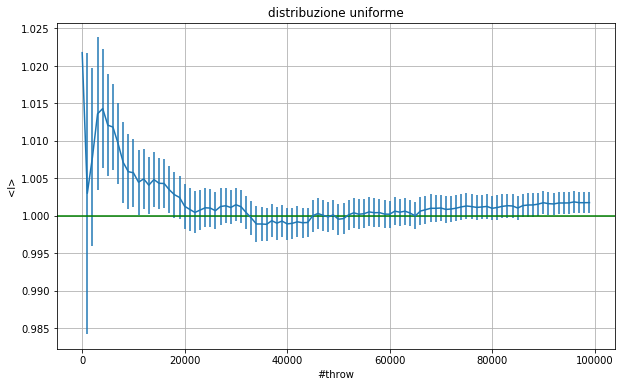

In [94]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics as stat 

fig=plt.figure(figsize=(10, 6))
x, f, error = np.loadtxt("Integrale.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=1.0, color='g', linestyle='-')
plt.title('distribuzione uniforme')
plt.xlabel('#throw')
plt.ylabel('<I>')
plt.grid(True)
plt.show()

Nel secondo grafico invece ho usato lo stesso metodo a blocchi ma l'integrale è stato calcolato attraverso l'"importance sampling" usando come funzione di distribuzione $p(x)=-2*(x-1)$ che non è altro che l'espansione di Taylor del coseno in 1 opportunamente normalizzata.

L'espressione che permette di generare numeri casuali che seguono questa distribuzione è $$1-\sqrt{1-x}$$ dove $x$ è un numero generato da una distribuzione uniforme in $[0,1]$.

Dal grafico si ottiene un buon accordo con il valore atteso.

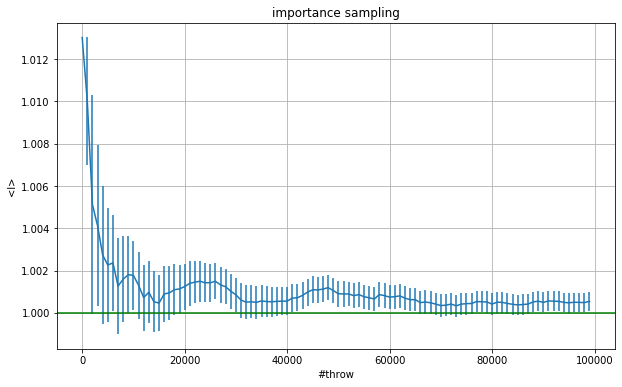

In [95]:
fig=plt.figure(figsize=(10, 6))
x, f, error = np.loadtxt("Integrale2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=1, color='g', linestyle='-')
plt.title('importance sampling')
plt.xlabel('#throw')
plt.ylabel('<I>')
plt.grid(True)
plt.show()

### Esercizio 02.2
Nella prima parte di questo esercizio ho simulato un Random Walk con un passo pari a $1$ e numero totale di passi discreti uguale a $100$. Per ottenere dati statistici il RW è stato ripetuto $10^4$ volte sempre ripartendo dall'origine.

Ad ogni passo ho calcolato il quadrato della distanza dall'origine $\langle |\vec{r}_N|^2 \rangle_{RW}$, alla fine da questo set di dati ho estrapolato il valor medio e tramite il metodo a blocchi ne ho calcolato l'incertezza $\sigma$. 

Nel grafico che segue è riportato $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ con la sua incertezza ricavata da $\frac{\sigma}{2*\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}}$ ottenuta tramite le formule di propagazione degli errori.

Si può osservare che gli errori sono molto piccoli e che la simulazione segue una legge che va come $f(N)=k\sqrt{N}$ con $k$ molto vicino a $1$ tipico dei fenomeni diffusivi.

fit parameter:  [1.00981735]


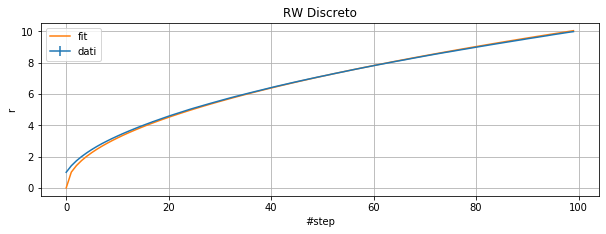

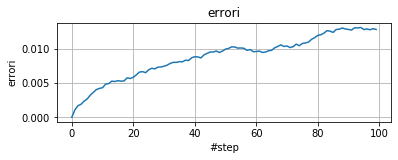

In [96]:
# Es 2.02.1
from scipy.optimize import curve_fit


def f(x,a):  # defining the fitting function
    return a*np.sqrt(x)

fig=plt.figure(figsize=(10, 7))
plt.subplot(211)

# Random walk graph
x, y, error = np.loadtxt("RWDiscreto.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error,label='dati')
plt.title('RW Discreto')
plt.xlabel('#step')
plt.ylabel('r')
plt.grid(True)

#FIT

p_opt, p_cov= curve_fit(f, x, y) #p_opt are the parameters of the fit
print ("fit parameter: ",p_opt)
y_fit = f(x,p_opt)
plt.plot(x,y_fit,label='fit') # plotting fitted function
plt.legend()
plt.show()

#error
plt.subplot(212)
plt.plot(error)
plt.title('errori')
plt.xlabel('#step')
plt.ylabel('errori')
plt.grid(True)
plt.show()


Nella seconda parte invece ho simulato un RW continuo con passo unitario ma con direzione ottenuta attraverso una generazione uniforme di un angolo solido definito dagli angoli $\theta$ e $\phi$ ottenuti dalle formule 
$$\theta=cos^{-1}(1-2x)$$ $$\phi=2\pi y$$
con x e y generati uniformemente in $[0,1)$. Anche in questo caso come è visibile dal grafico sottostante è stato calcolato $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ con il relativo errore. Gli errori sono molto piccoli e il fit indica che il processo è diffusivo in accordo con le aspettative.

fit parameter:  [1.00920324]


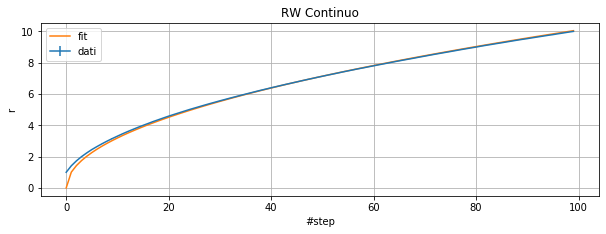

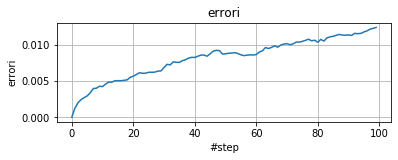

In [97]:
# Es 2.02.2


fig=plt.figure(figsize=(10, 7))
plt.subplot(211)

# Random walk graph
x, y, error = np.loadtxt("RWContinuo.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error,label='dati')
plt.title('RW Continuo')
plt.xlabel('#step')
plt.ylabel('r')
plt.grid(True)

#FIT

p_opt, p_cov= curve_fit(f, x, y) #p_opt are the parameters of the fit
print ("fit parameter: ",p_opt)
y_fit = f(x,p_opt)
plt.plot(x,y_fit,label='fit') # plotting fitted function
plt.legend()
plt.show()

#error
plt.subplot(212)
plt.plot(error)
plt.title('errori')
plt.xlabel('#step')
plt.ylabel('errori')
plt.grid(True)
plt.show()
